In [1]:
%matplotlib inline
import skyflux as sf

Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
Missing spectral index for: GLEAM J202818-254302


//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

In [3]:
arbitrary_source = sf.catalog.obj_catalog[999]
arb_ra = arbitrary_source.ra_angle
arb_dec = arbitrary_source.dec_angle
J = sf.stokes.create_J(ra=arb_ra, dec=arb_dec)
J.shape
J

array([[[ 0.0271958 -0.00708321j, -0.01718447+0.01081504j],
        [ 0.01320706-0.00971923j,  0.01861129-0.02680871j]]])

In [4]:
arb_ra = sf.rot.get_lst(radians=False)
arb_dec = sf.rot.hera_lat
print(sf.rot.hera_lat)
J = sf.stokes.create_J(ra=arb_ra, dec=arb_dec, lst=sf.rot.get_lst(radians=False), radians=False)

-30.72138888888889


In [5]:
J

array([[[ 8.12625503e-01-5.82786230e-01j,
         -2.80893821e-05-3.16860901e-05j],
        [ 2.80893823e-05+3.16860904e-05j,
          8.12625503e-01-5.82786230e-01j]]])

In [6]:
Am = sf.stokes.create_A(ra=arb_ra, dec=arb_dec, radians=False)
print(Am)
Am.shape

[[[ 9.99999998e-01+0.j  1.96782757e-10+0.j  7.64233932e-13+0.j
   -8.42380115e-05+0.j]]

 [[ 1.96778649e-10+0.j  9.99999995e-01+0.j -3.68060365e-06+0.j
    4.91296642e-11+0.j]]

 [[ 7.60412759e-13+0.j  3.68060365e-06+0.j  9.99999995e-01+0.j
    5.39595619e-11+0.j]]

 [[-8.42380115e-05+0.j -4.91464392e-11+0.j -5.39594452e-11+0.j
    9.99999998e-01+0.j]]]


(4, 1, 4)

In [7]:
Am[0][0][0]

(0.9999999980690943+0j)

In [8]:
# Display available antennae
print(sf.demo.active_ants)

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 27, 36, 37, 38, 39, 40, 41, 50, 51, 52, 53, 54, 55, 65, 66, 67, 68, 69, 70, 71, 82, 83, 84, 85, 86, 87, 88, 98, 120, 121, 122, 123, 124, 136, 137, 138, 139, 140, 141, 142, 143]


In [49]:
# we sample three arbitrary sources, and 2/3 are zero
print(arbitrary_source)
print(sf.vis.visibility(2, 11, arbitrary_source))

print(sf.vis.visibility(36, 37, sf.catalog.obj_catalog[981]))
print(sf.vis.visibility(88, 121, sf.catalog.obj_catalog[134]))
print()

min_residual = 100
target = sf.rot.hera_lat
best_i = -1
for i in range(len(sf.catalog.obj_catalog)):
    obj = sf.catalog.obj_catalog[i]
    residual = (obj.dec_angle - target) ** 2
    if residual < min_residual:
        min_residual = residual
        best_i = i
print(best_i)
print(sf.catalog.obj_catalog[best_i])
best_source = sf.catalog.obj_catalog[best_i]
print("Flux at 151MHz:", best_source.flux_by_frq[151])
# also, would we not expect the first term to dominate? And yet it is not even the largest
    # of numbers all with magnitudes less than one

Name: GLEAM J185915-381842
Right ascension: 284.8155
Declination: -37.688250000000004
151 MHz flux: 1.2316479999999999

[ 7.15700485e-04+1.89158974e-04j  2.73678016e-04+7.23328460e-05j
 -3.65591700e-05-9.66255473e-06j -2.93372520e-05-7.75380849e-06j]
[ 3.58823098e-04+9.47670841e-04j -3.78283247e-05-9.99066125e-05j
  2.73128042e-05+7.21345652e-05j -4.81088844e-06-1.27058116e-05j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j]

2581
Name: GLEAM J150108-311646
Right ascension: 225.285125
Declination: -30.72038888888889
151 MHz flux: 2.077937

Flux at 151MHz: 2.077937


In [46]:
ra = np.radians(best_source.ra_angle)
dec = np.radians(best_source.dec_angle)
dec = np.radians(sf.rot.hera_lat)

r = sf.rot.radec2lm(ra, dec, ra0=0)

print(r)

print(sf.ant.baseline(88, 121)[0:2])

(0.6108900225007089, 0.748160993231249)
[-43.92014994  25.13624112]


In [34]:
"""
This section kills the kernel! Do NOT run it!!
I am leaving it here as a to-do of sorts. I think, that my inability
to run it in this environment may be a bad sign.
(It does work fine in the shell, so far as I can tell.)

t = 0
arg = 134

obj = flux.catalog.obj_catalog[arg]
ra = np.radians(obj.ra_angle)
dec = np.radians(obj.dec_angle)
while t < 2 * np.pi:
    print(t)
    t += np.pi / 72
    
    print(flux.stokes.J_matrix(ra, dec, t))
    print("\n")

"""

'\nThis section kills the kernel! Do NOT run it!!\nI am leaving it here as a to-do of sorts. I think, that my inability\nto run it in this environment may be a bad sign.\n(It does work fine in the shell, so far as I can tell.)\n\nt = 0\narg = 134\n\nobj = flux.catalog.obj_catalog[arg]\nra = np.radians(obj.ra_angle)\ndec = np.radians(obj.dec_angle)\nwhile t < 2 * np.pi:\n    print(t)\n    t += np.pi / 72\n    \n    print(flux.stokes.J_matrix(ra, dec, t))\n    print("\n")\n\n'

In [47]:
vist = sf.vis.source_over_time(
    88, 121, best_source, np.pi, 2 * np.pi, np.pi / 288
)
vist

//anaconda3/envs/hera/lib/python3.8/site-packages/skyflux/vis.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([lst, visibility(ant1, ant2, source, nu, time=lst)])


array([[3.141592653589793,
        array([6.38182690e-04-1.03506290e-03j, 2.09984920e-04-3.40572698e-04j,
       4.11303409e-05-6.67089388e-05j, 2.20339443e-05-3.57366608e-05j])],
       [3.152500961414758,
        array([1.30270394e-03+2.27858848e-04j, 4.72225426e-04+8.25980010e-05j,
       9.24711764e-05+1.61743394e-05j, 3.69507558e-05+6.46313899e-06j])],
       [3.1634092692397227,
        array([2.96268213e-04+1.46792890e-03j, 1.06115098e-04+5.25771622e-04j,
       1.88795313e-05+9.35429736e-05j, 6.09980847e-06+3.02229019e-05j])],
       [3.1743175770646874,
        array([-1.47036641e-03+9.31233464e-04j, -4.76761065e-04+3.01949131e-04j,
       -6.85751235e-05+4.34309771e-05j, -1.88773947e-05+1.19557013e-05j])],
       [3.185225884889652,
        array([-1.63212970e-03-1.23447793e-03j, -4.44975008e-04-3.36561382e-04j,
       -4.00316559e-05-3.02783509e-05j, -9.99686075e-06-7.56122750e-06j])],
       [3.196134192714617,
        array([7.00671228e-04-2.30172495e-03j, 1.49655520e-04-4

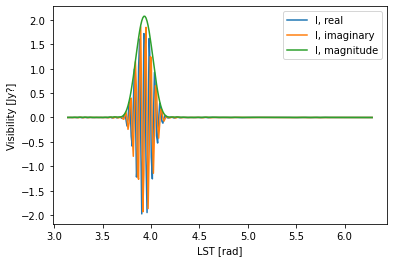

In [48]:
I = np.array([v[1][0] for v in vist])

plt.plot(vist[:, 0], np.real(I), label="I, real")
plt.plot(vist[:, 0], np.imag(I), label="I, imaginary")
plt.plot(vist[:, 0], np.abs(I), label="I, magnitude")

plt.xlabel("LST [rad]")
plt.ylabel("Visibility [Jy?]")

plt.legend()
plt.show()

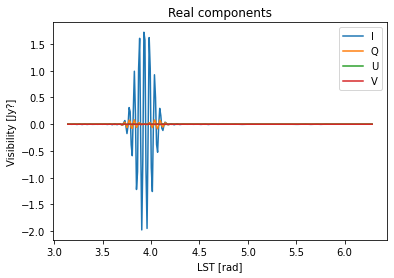

In [50]:
Q = np.array([v[1][1] for v in vist])
U = np.array([v[1][2] for v in vist])
V = np.array([v[1][3] for v in vist])

plt.plot(vist[:, 0], np.real(I), label="I")
plt.plot(vist[:, 0], np.real(Q), label="Q")
plt.plot(vist[:, 0], np.real(U), label="U")
plt.plot(vist[:, 0], np.real(V), label="V")

plt.xlabel("LST [rad]")
plt.ylabel("Visibility [Jy?]")
plt.title("Real components")

plt.legend()
plt.show()

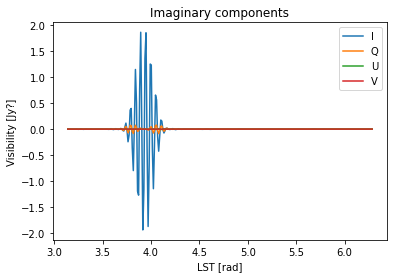

In [51]:
plt.plot(vist[:, 0], np.imag(I), label="I")
plt.plot(vist[:, 0], np.imag(Q), label="Q")
plt.plot(vist[:, 0], np.imag(U), label="U")
plt.plot(vist[:, 0], np.imag(V), label="V")

plt.xlabel("LST [rad]")
plt.ylabel("Visibility [Jy?]")
plt.title("Imaginary components")

plt.legend()
plt.show()

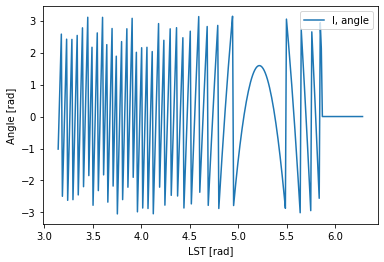

In [52]:
plt.plot(vist[:, 0], np.angle(I), label="I, angle")

plt.xlabel("LST [rad]")
plt.ylabel("Angle [rad]")

plt.legend()
plt.show()

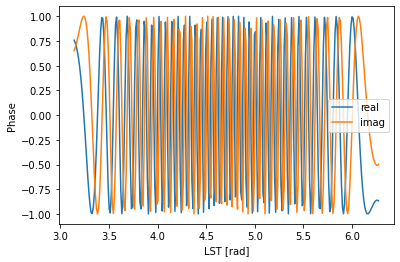

In [17]:
ra = np.radians(arbitrary_source.ra_angle)
dec = np.radians(arbitrary_source.dec_angle)
lst_list = [np.pi / 288 * i for i in range(288, 576)]

#print(lst_list)

phases = np.array([sf.ant.phase_factor(88, 121, sf.rot.radec2lm(ra, dec, ra0=lst)) for lst in 
    lst_list
])
plt.plot(lst_list, np.real(phases), label="real")
plt.plot(lst_list, np.imag(phases), label="imag")

plt.xlabel("LST [rad]")
plt.ylabel("Phase")

plt.legend()
plt.show()

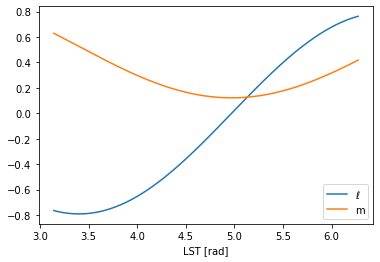

In [18]:
# The source does not pass through zenith
# m should reach zero for it to be considered zenith

lst_list = [np.pi / 288 * i for i in range(288, 576)]

list_r = np.array([sf.rot.radec2lm(ra, dec, ra0=lst) for lst in 
    lst_list
])
plt.plot(lst_list, list_r[:, 0], label="$\ell$")
plt.plot(lst_list, list_r[:, 1], label="m")

plt.xlabel("LST [rad]")
#plt.ylabel("?")

plt.legend()
plt.show()

Right ascension: 4.97096823571391
LST interval 0.003472222222222222
Declination: -0.536165146212658
Reference point: -0.536165146212658
[ 1.07043417e-03+0.j -2.46963953e-04+0.j  5.06253661e-04+0.j
  8.11233108e-06+0.j]


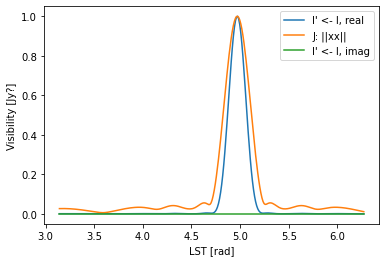

In [32]:
# this section is wrong. The magnitude should approach 1
    # I have checked to make sure dec != -30.72 deg is not the issue
        # (pure_J.ipynb indicated that I should expect some gaussian behavior
            # in dec, but fixing that value did not improve the results).

lst_list = [np.pi / 288 * i for i in range(288, 576)]

dec = np.radians(-30.72)

# constants for the LST plot
print("Right ascension:", ra)
print("LST interval", 1 / 288)
print("Declination:", dec)
print("Reference point:", np.radians(-30.72))

list_A = []
list_J = []

for lst in lst_list:
    J = sf.stokes.create_J(ra=ra, dec=dec, lst=lst, radians=True)
    list_J.append(J)
    A = sf.stokes.create_A(J=J)
    list_A.append(A)

list_A = np.array(list_A)
list_J = np.array(list_J)
    
print(list_A[0][0][0])

plt.plot(lst_list, np.real(list_A[:, 0, 0, 0]), label="I' <- I, real")
plt.plot(lst_list, np.abs(list_J[:, 0, 0, 0]), label="J: ||xx||")
plt.plot(lst_list, np.imag(list_A[:, 0, 0, 0]), label="I' <- I, imag")

plt.xlabel("LST [rad]")
plt.ylabel("Visibility [Jy?]")

plt.legend()
plt.show()

In [20]:
print("The following is the universal baseline")
print(sf.ant.baseline(88, 121))

The following is the universal baseline
[-43.92014994  25.13624112  -0.34038648]


In [21]:
len(sf.catalog.obj_catalog)

3872